# **Iris Flowers Classification ML Project**

**DATA DESCRIPTION**
>The dataset contains 3 classes with each having 50 instances.

>Information about the attributes in the dataset are provided below:

sepal_length : Sepal length in cm	

sepal_width	: Sepal width in cm

petal_length : Petal length in cm

petal_width	: Petal width in cm

species : There are 3 classes in this attribute.


1.   Iris-setosa
2.   Iris-virginica
3.   Iris-versicolor



# Import Libraries and load dataset

In [4]:
#Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Loading and reading the dataset
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IRIS.csv")

In [6]:
#Preview of dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
#shape of dataset
df.shape

(150, 5)

The dataset contains 150 instances and 5 supporting attributes.

In [9]:
#check for null or missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

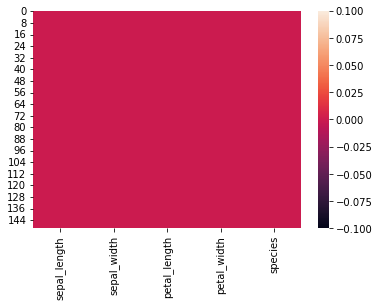

In [10]:
#heatmap showing if null values are present
sns.heatmap(df.isnull())

The above plot shows that the dataset has no null values.

In [11]:
#statistical description of dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
#check datatype of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The data contains numerical and categorical values.

In [13]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


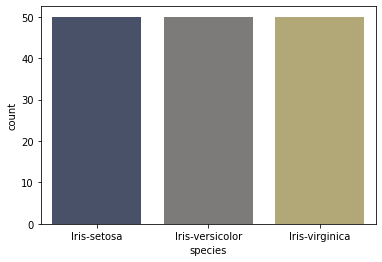

In [15]:
sns.countplot('species', data=df, palette="cividis")

# Exploratory Data Analysis

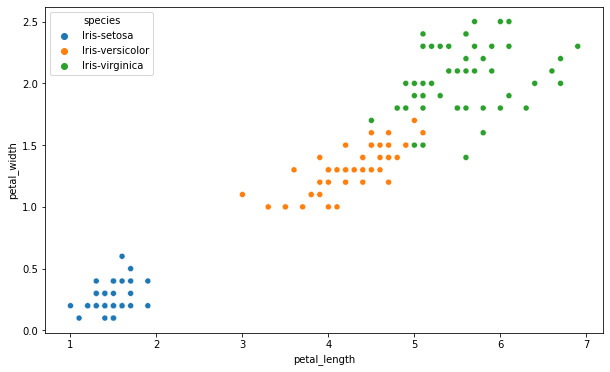

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['petal_length'], y=df['petal_width'], hue=df['species'])

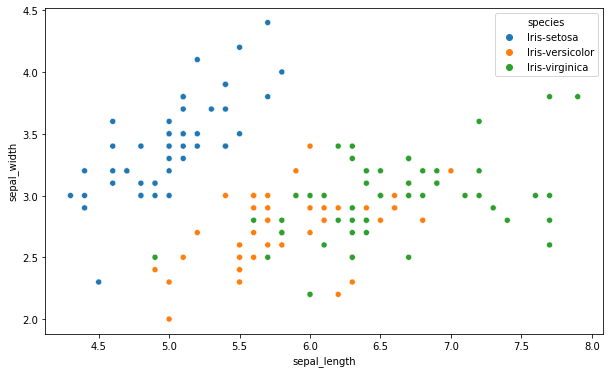

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['sepal_length'], y=df['sepal_width'], hue=df['species'])

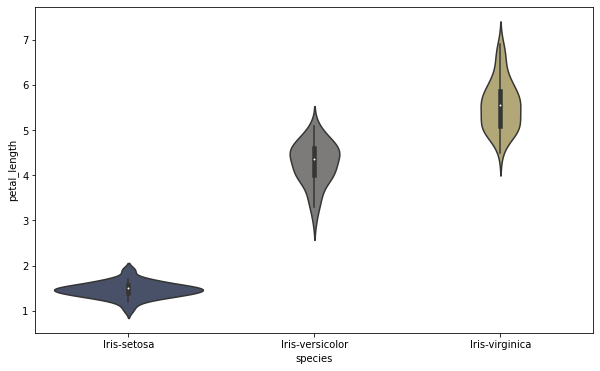

In [18]:
plt.figure(figsize=(10,6))
sns.violinplot(x=df['species'], y=df['petal_length'], palette="cividis")

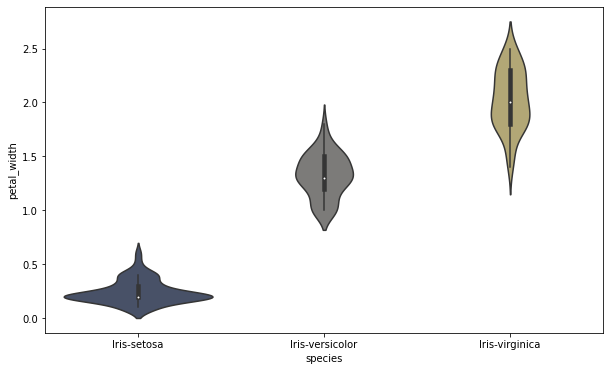

In [19]:
plt.figure(figsize=(10,6))
sns.violinplot(x=df['species'], y=df['petal_width'], palette="cividis")

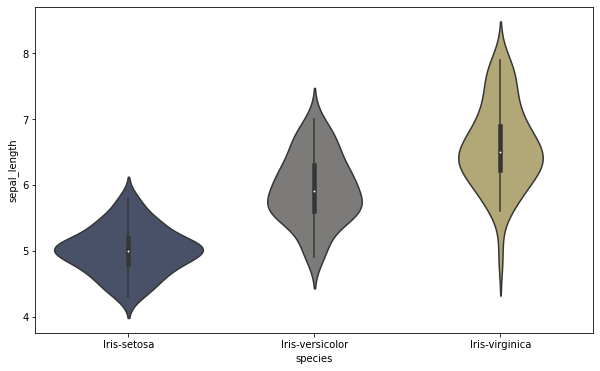

In [20]:
plt.figure(figsize=(10,6))
sns.violinplot(x=df['species'], y=df['sepal_length'], palette="cividis")

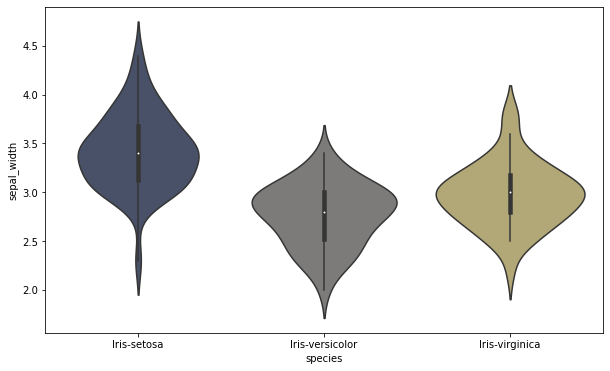

In [21]:
plt.figure(figsize=(10,6))
sns.violinplot(x=df['species'], y=df['sepal_width'], palette="cividis")

The above violin plots show the density of the lengths and widths of the species. 

<Figure size 720x432 with 0 Axes>

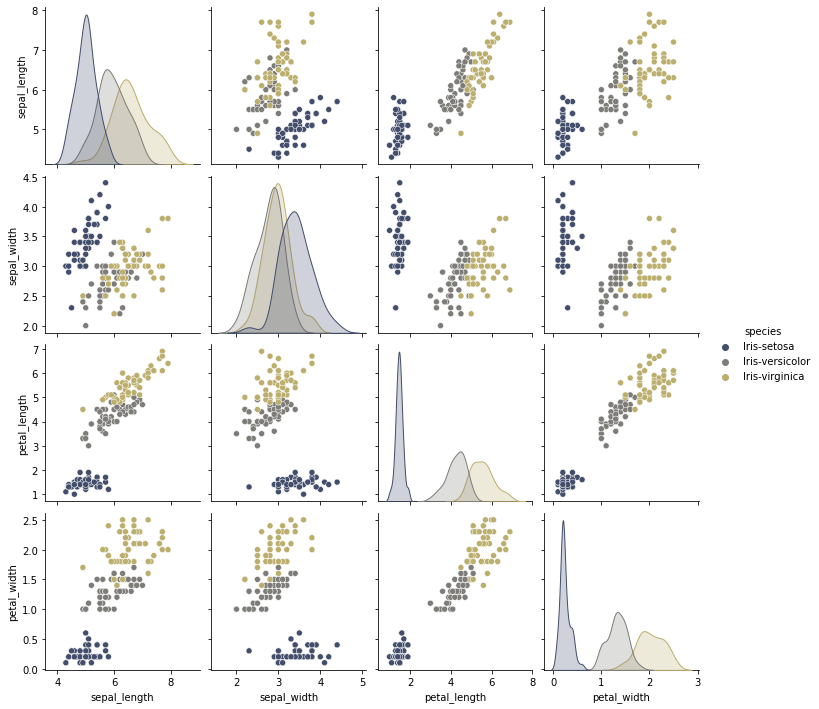

In [22]:
plt.figure(figsize=(10,6))
plot=sns.pairplot(df,hue="species", palette="cividis")

# Modeling

###Logistic Regression Model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

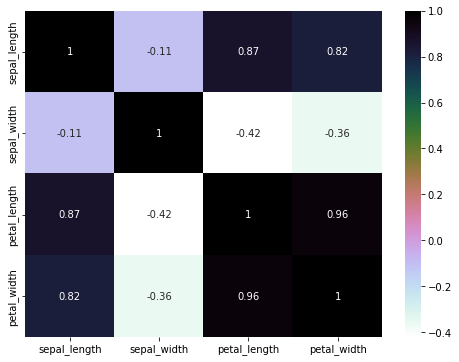

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r')

The above plot shows the correlation between the independent and dependent features of the dataset.
Here, the petal length and petal width are highly correlated but sepal length and sepal width are not correlated.

In [25]:
#splitting train and test data
train, test=train_test_split(df, test_size=0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [26]:
X_train, X_test = train[['sepal_length',	'sepal_width',	'petal_length',	'petal_width']], test[['sepal_length',	'sepal_width',	'petal_length',	'petal_width']]
y_train, y_test = train.species, test.species

In [35]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
70,5.9,3.2,4.8,1.8
109,7.2,3.6,6.1,2.5
82,5.8,2.7,3.9,1.2
17,5.1,3.5,1.4,0.3
4,5.0,3.6,1.4,0.2


In [27]:
#loading Logistic Regression and fitting train data
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [28]:
#predicting output for test input data
y_pred=model.predict(X_test)
y_pred[:5]

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

In [29]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[12,  0,  0],
       [ 0, 17,  1],
       [ 0,  2, 13]])

Text(91.68, 0.5, 'Predicted Value')

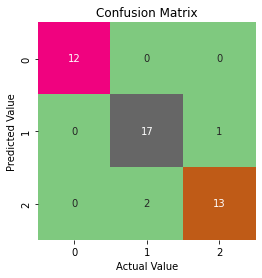

In [30]:
sns.heatmap(cm,square=True,annot=True,cmap='Accent',fmt='g',cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

In [31]:
#accuracy evaluation for logistic regressor
from sklearn.metrics import accuracy_score
print('Accuracy score of the Logistic Regression model is:', accuracy_score(y_test, y_pred))

Accuracy score of the Logistic Regression model is: 0.9333333333333333


Logistic regressor has achieved an accuray of 97% which shows it is a good classifier for this purpose.

### Support Vector Classifier

In [36]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the SVM Model is',accuracy_score(prediction,y_test))

The accuracy of the SVM Model is 0.9777777777777777


SVC has achieved an accuray of 97% which shows it is good classifier for this purpose.

### Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Decision Tree is',accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is 0.9555555555555556


Decision Tree Classifier has achieved an accuray of 95% which shows it is good classifier for this purpose.

### K-Nearest Neighbor

In [37]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the KNN Model  is',accuracy_score(prediction,y_test))

The accuracy of the KNN Model  is 0.9111111111111111


KNN has achieved an accuray of 91% which shows it is good classifier for this purpose.

**Conclusion**

>After experimenting with 4 different machine learning models, it is seen that Logistic Regressor and SVM come up with the highest accuracy followed by Decision Tree classifier and KNN (least accuracy).